In [1]:
import mock

Connecting daveliu@mesoscale-activity.datajoint.io:3306


In [2]:
#mock.mockdata()

In [3]:
import datajoint as dj

In [4]:
import ephys

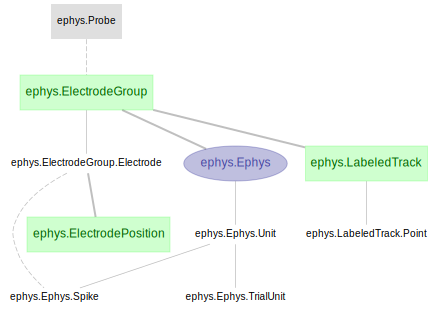

In [5]:
dj.ERD(ephys)

In [6]:
mouse=ephys.experiment.lab.Animal()
#mouse.insert1((123459,'2017-08-09'))
mouse

animal Janelia ANM ID (6 digits),dob
123456,2017-08-01
123457,2017-08-01
123458,2017-08-09
123459,2017-08-09
397853,2017-08-01
399752,2017-08-01


In [7]:
h2o=ephys.experiment.lab.AnimalWaterRestriction()
#h2o.insert1((123458,'tw6'))
h2o

animal Janelia ANM ID (6 digits),water_restriction water restriction number
123456,tw5
123457,dl9
123458,tw5
123458,tw6
397853,dl14
399752,dl7


In [8]:
person=ephys.experiment.lab.Person()
person

username,fullname
daveliu,Dave Liu


In [9]:
rig=ephys.experiment.lab.Rig()
rig

rig,rig_description
EPhys1,Ephys rig 1
RRig,Recording rig
TRig1,Training rig 1
TRig2,Training rig 2
TRig3,Training rig 3


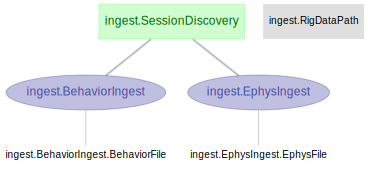

In [10]:
import ingest
dj.ERD(ingest)

In [11]:
import mapshell

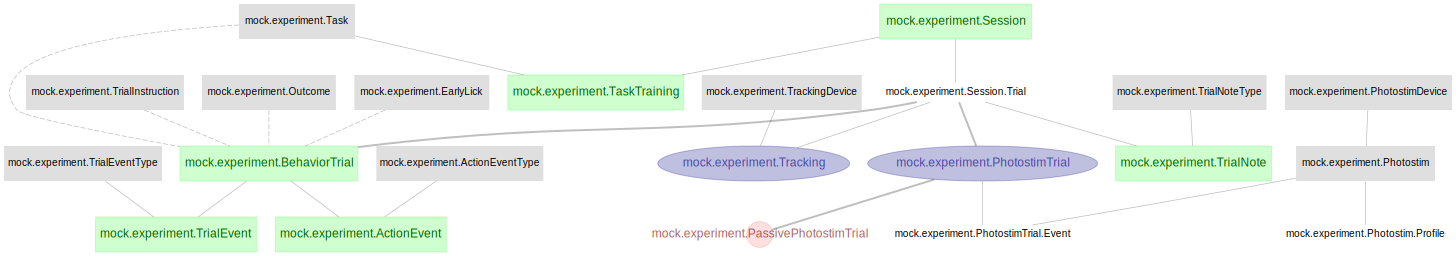

In [12]:
dj.ERD(ephys.experiment)

In [13]:
mapshell.discover()

b6_TW_autoTrain_20171107_100620.mat skipped - no animal for b6
b6_TW_autoTrain_20171108_095511.mat skipped - no animal for b6
b6_TW_autoTrain_20171109_093437.mat skipped - no animal for b6
b6_TW_autoTrain_20171110_064105.mat skipped - no animal for b6
b6_TW_autoTrain_20171113_095102.mat skipped - no animal for b6
b6_TW_autoTrain_20171114_093558.mat skipped - no animal for b6
b6_TW_autoTrain_20171115_093104.mat skipped - no animal for b6
b6_TW_autoTrain_20171115_093445.mat skipped - no animal for b6
b6_TW_autoTrain_20171116_100944.mat skipped - no animal for b6
b6_TW_autoTrain_20171117_095905.mat skipped - no animal for b6
b67_TW_autoTrain_20171107_091040.mat skipped - no animal for b67
b67_TW_autoTrain_20171109_102128.mat skipped - no animal for b67
b67_TW_autoTrain_20171113_105817.mat skipped - no animal for b67
b67_TW_autoTrain_20171114_104840.mat skipped - no animal for b67
b67_TW_autoTrain_20171114_113832.mat skipped - no animal for b67
b67_TW_autoTrain_20171115_103728.mat skipped 

ihkhk_TW_autoTrain_20170912_165910.mat skipped - no animal for ihkhk
ihkhk_TW_autoTrain_20170912_170046.mat skipped - no animal for ihkhk
ihkhk_TW_autoTrain_20170912_193807.mat skipped - no animal for ihkhk
ihkhk_TW_autoTrain_20170913_162019.mat skipped - no animal for ihkhk
ihkhk_TW_autoTrain_20170913_162059.mat skipped - no animal for ihkhk
ihkhk_TW_autoTrain_20170913_162208.mat skipped - no animal for ihkhk
ihkhk_TW_autoTrain_20170913_162545.mat skipped - no animal for ihkhk
ihkhk_TW_autoTrain_20170913_162842.mat skipped - no animal for ihkhk
ihkhk_TW_autoTrain_20170913_164946.mat skipped - no animal for ihkhk
ihkhk_TW_autoTrain_20170913_172018.mat skipped - no animal for ihkhk
ihkhk_TW_autoTrain_20170913_172341.mat skipped - no animal for ihkhk
ihkhk_TW_autoTrain_20170913_172519.mat skipped - no animal for ihkhk
ihkhk_TW_autoTrain_20170913_172651.mat skipped - no animal for ihkhk
ihkhk_TW_autoTrain_20170915_173722.mat skipped - no animal for ihkhk
ihkhk_TW_autoTrain_20170915_173837

pt201_TW_autoTrain_20171027_144741.mat skipped - no animal for pt201
pt201_TW_autoTrain_20171030_112315.mat skipped - no animal for pt201
pt201_TW_autoTrain_20171030_112653.mat skipped - no animal for pt201
pt201_TW_autoTrain_20171031_094804.mat skipped - no animal for pt201
pt201_TW_autoTrain_20171101_100137.mat skipped - no animal for pt201
pt201_TW_autoTrain_20171103_095237.mat skipped - no animal for pt201
pt201_TW_autoTrain_20171106_082130.mat skipped - no animal for pt201
t1fixed_TW_autoTrain_20171008_203834.mat skipped - no animal for t1fixed
t1fixed_TW_autoTrain_20171008_225455.mat skipped - no animal for t1fixed
t1fixed_TW_autoTrain_20171009_204825.mat skipped - no animal for t1fixed
t1fixed_TW_autoTrain_20171009_214026.mat skipped - no animal for t1fixed
t1fixed_TW_autoTrain_20171014_200527.mat skipped - no animal for t1fixed
t1fixed_TW_autoTrain_20171014_202405.mat skipped - no animal for t1fixed
t1fixed_TW_autoTrain_20171014_202957.mat skipped - no animal for t1fixed
t1fixe

T49_TW_autoTrain_20170929_193316.mat skipped - no animal for T49
T49_TW_autoTrain_20170929_200833.mat skipped - no animal for T49
T49_TW_autoTrain_20170929_201005.mat skipped - no animal for T49
tw42_TW_autoTrain_20171108_160655.mat skipped - no animal for tw42
tw4_TW_autoTrain_20171107_104109.mat skipped - no animal for tw4
tw4_TW_autoTrain_20171109_212455.mat skipped - no animal for tw4
tw4_TW_autoTrain_20171109_221936.mat skipped - no animal for tw4
tw4_TW_autoTrain_20171110_180146.mat skipped - no animal for tw4
tw4_TW_autoTrain_20171110_185223.mat skipped - no animal for tw4
tw4_TW_autoTrain_20171111_164425.mat skipped - no animal for tw4
tw4_TW_autoTrain_20171113_180623.mat skipped - no animal for tw4
tw4_TW_autoTrain_20171114_161401.mat skipped - no animal for tw4
tw4_TW_autoTrain_20171115_211937.mat skipped - no animal for tw4
tw4_TW_autoTrain_20171116_212636.mat skipped - no animal for tw4
tw4_TW_autoTrain_20171117_215328.mat skipped - no animal for tw4
tw4_TW_autoTrain_201711

WR6_TW_autoTrain_20171016_200551.mat skipped - no animal for WR6
WR6_TW_autoTrain_20171016_201516.mat skipped - no animal for WR6
WR6_TW_autoTrain_20171017_174937.mat skipped - no animal for WR6
WR6_TW_autoTrain_20171017_181934.mat skipped - no animal for WR6
WR6_TW_autoTrain_20171017_192419.mat skipped - no animal for WR6
WR6_TW_autoTrain_20171017_193619.mat skipped - no animal for WR6
WR6_TW_autoTrain_20171018_195718.mat skipped - no animal for WR6
WR6_TW_autoTrain_20171018_204043.mat skipped - no animal for WR6
WR6_TW_autoTrain_20171019_174303.mat skipped - no animal for WR6
WR6_TW_autoTrain_20171019_175457.mat skipped - no animal for WR6
WR6_TW_autoTrain_20171019_180619.mat skipped - no animal for WR6
WR6_TW_autoTrain_20171019_182354.mat skipped - no animal for WR6
WR6_TW_autoTrain_20171019_182717.mat skipped - no animal for WR6
WR6_TW_autoTrain_20171019_183351.mat skipped - no animal for WR6
WR6_TW_autoTrain_20171019_184014.mat skipped - no animal for WR6
WR6_TW_autoTrain_20171020

In [ ]:
sessDis=ingest.SessionDiscovery()
sessDis

animal Janelia ANM ID (6 digits),water_restriction water restriction number,session_date discovered date
123456,tw5,2017-09-11
123456,tw5,2017-09-12
123456,tw5,2017-09-13
123456,tw5,2017-09-14
123456,tw5,2017-09-15
123456,tw5,2017-09-18
123456,tw5,2017-09-19


In [ ]:
mapshell.populate()

no file matches found.. check directories
no file matches found.. check directories
no file matches found.. check directories
no file matches found.. check directories
no file matches found.. check directories
no file matches found.. check directories
no file matches found.. check directories
no file matches found.. check directories
no file matches found.. check directories
no file matches found.. check directories
no file matches found.. check directories
no file matches found.. check directories
no file matches found.. check directories


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io as spio
import numpy as np

In [ ]:
trialNote = ephys.experiment.TrialNote()

In [ ]:
ephys.experiment.Session() & 'animal = 399

In [ ]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [ ]:
outcome = (behaviorTrial & 'animal = 397853').fetch('outcome', order_by='session')
early_lick = (behaviorTrial  & 'animal = 397853').fetch('early_lick', order_by='session')

In [ ]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))

In [ ]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1

In [ ]:
trial_note = (trialNote & 'animal = 397853').fetch('trial_note', order_by='session')
results = list(map(int, trial_note))
protDiff = np.diff(results)
protChange = np.where(protDiff != 0)

In [ ]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [ ]:
yMA = movingaverage(data,600)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')

In [ ]:
yMA = movingaverage(data1,600)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')